In [0]:
import numpy as np
import pandas as pd

###1. Загрузите данные за май 2016 года.

In [0]:
file = "yellow_tripdata_2016-05.csv"

In [0]:
data = pd.read_csv(file)

In [0]:
print len(data)

11836853


###2. Проведите фильтрацию

####2.1 Удалите поездки с нулевой длительностью

In [0]:
data.drop(data[data.tpep_pickup_datetime == data.tpep_dropoff_datetime].index , inplace=True)

In [0]:
print len(data)

11824585


####2.2 Удалите поездки с ннулевым количеством пассажиров

In [0]:
data.drop(data[data.passenger_count == 0].index , inplace=True)

In [0]:
print len(data)

11824063


####2.3 Удалите поездки с нулевым расстоянием поездки по счётчику

In [0]:
data.drop(data[data.trip_distance == 0].index , inplace=True)

In [0]:
print len(data)

11763422


####2.4 Удалите поездки с координатами начала, не попадающими в прямоугольник Нью-Йорка

Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты

In [0]:
data.drop(data[data.pickup_longitude < -74.25559].index , inplace=True)
data.drop(data[data.pickup_longitude > -73.70001].index , inplace=True)
data.drop(data[data.pickup_latitude  <  40.49612].index , inplace=True)
data.drop(data[data.pickup_latitude  >  40.91553].index , inplace=True)


In [0]:
print len(data)

11626521


####3. Агрегируйте данные за май 2016 года по часам и областям.

In [0]:
filename = 'regions.csv'

In [0]:
regions = pd.read_csv(filename, ';')

In [0]:
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


####3.1. Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.

In [0]:
#1. Создать список для координат долготы
longitude_list = np.linspace(-74.25559, -73.70001, num=50, endpoint=False)
longitude_list = [round(x, 6) for x in longitude_list]
longitude_list.append(-73.70001)
print longitude_list

[-74.25559, -74.244478, -74.233367, -74.222255, -74.211144, -74.200032, -74.18892, -74.177809, -74.166697, -74.155586, -74.144474, -74.133362, -74.122251, -74.111139, -74.100028, -74.088916, -74.077804, -74.066693, -74.055581, -74.04447, -74.033358, -74.022246, -74.011135, -74.000023, -73.988912, -73.9778, -73.966688, -73.955577, -73.944465, -73.933354, -73.922242, -73.91113, -73.900019, -73.888907, -73.877796, -73.866684, -73.855572, -73.844461, -73.833349, -73.822238, -73.811126, -73.800014, -73.788903, -73.777791, -73.76668, -73.755568, -73.744456, -73.733345, -73.722233, -73.711122, -73.70001]


In [0]:
#2. Создать список для координат штроты
latitude_list = np.linspace(40.49612, 40.91553, num=50, endpoint=False)
latitude_list = [round(x, 7) for x in latitude_list]
latitude_list.append(40.91553)
print latitude_list

[40.49612, 40.5045082, 40.5128964, 40.5212846, 40.5296728, 40.538061, 40.5464492, 40.5548374, 40.5632256, 40.5716138, 40.580002, 40.5883902, 40.5967784, 40.6051666, 40.6135548, 40.621943, 40.6303312, 40.6387194, 40.6471076, 40.6554958, 40.663884, 40.6722722, 40.6806604, 40.6890486, 40.6974368, 40.705825, 40.7142132, 40.7226014, 40.7309896, 40.7393778, 40.747766, 40.7561542, 40.7645424, 40.7729306, 40.7813188, 40.789707, 40.7980952, 40.8064834, 40.8148716, 40.8232598, 40.831648, 40.8400362, 40.8484244, 40.8568126, 40.8652008, 40.873589, 40.8819772, 40.8903654, 40.8987536, 40.9071418, 40.91553]


In [0]:
#3. Массив регионов и координат

ny_arr = np.zeros((2500,5))

for i in range(50):
  for j in range(50):
    cnt = i * 50 + j
    ny_arr[cnt][0] = int(cnt + 1)
    ny_arr[cnt][1] = longitude_list[i]
    ny_arr[cnt][2] = longitude_list[i + 1]
    ny_arr[cnt][3] = latitude_list[j]
    ny_arr[cnt][4] = latitude_list[j + 1]

In [0]:
#4. Засунуть массив в DataFrame
l_col = ['region', 'west', 'east', 'south', 'north']
NY_regions = pd.DataFrame(ny_arr, columns = l_col)
NY_regions.region = [int(x) for x in NY_regions.region]

In [0]:
#5 Вытащить уникальные границы из regions.csv
xbins = regions.west.unique()
xbins = np.append(xbins, -73.70001)
ybins = regions.south.unique()
ybins = np.append(ybins, 40.91553)

####3.2. Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.

Для удобства итерирования по часам изменим формат времени начала и окончания посадки на datetime в исходном датасете


In [0]:
from datetime import datetime
#1. Вытащить данные за каждый час
#1.1 Изменить формат времени
data.tpep_pickup_datetime  = data.tpep_pickup_datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data.tpep_dropoff_datetime = data.tpep_dropoff_datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [0]:
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [0]:
from datetime import timedelta
#Стартовое значение
start_time = data.tpep_pickup_datetime[0]

In [0]:
#1. Вытащить уникальные границы из regions.csv
xbins = regions.west.unique()
xbins = np.append(xbins, -73.70001)
ybins = regions.south.unique()
ybins = np.append(ybins, 40.91553)

In [0]:
from scipy.stats import binned_statistic_2d
hour_list = []
hours_cnt = 31 * 24

#статус бар:
from IPython.display import display
from ipywidgets import IntProgress
progress_bar = IntProgress(value=15, min=0, max=hours_cnt, description='', bar_style='success')
display(progress_bar)

#2 Цикл для указанного количества дней 
for i in range(hours_cnt):
  current_hour = data[(data.tpep_pickup_datetime >= start_time + timedelta(hours=1) * (i)) & (data.tpep_pickup_datetime < start_time + timedelta(hours=1) * (i + 1))]
  arr = current_hour[['pickup_longitude', 'pickup_latitude']].values
  ret = binned_statistic_2d(arr[:,0],arr[:,1],None,'count',bins=[xbins, ybins])
  hour_string = [ret.statistic[x][y] for x in range(50) for y in range(50)]
  hour_list.append(hour_string)
  #статус бар
  progress_bar.value += 1

IntProgress(value=15, bar_style=u'success', max=744)

####4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.

In [0]:
#Создать dataframe из массива. В качестве индекса использовать дату и час.
#сгенерировать список регионов
regions_list = ['region_' + str(x) for x in range(1,2500 + 1)]
hour_index = [start_time + timedelta(hours=1) * (x) for x in range(hours_cnt)]
regions_df = pd.DataFrame(hour_list, columns = regions_list, index = hour_index)
regions_df.head()

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_30,region_31,region_32,region_33,region_34,region_35,region_36,region_37,region_38,region_39,region_40,...,region_2461,region_2462,region_2463,region_2464,region_2465,region_2466,region_2467,region_2468,region_2469,region_2470,region_2471,region_2472,region_2473,region_2474,region_2475,region_2476,region_2477,region_2478,region_2479,region_2480,region_2481,region_2482,region_2483,region_2484,region_2485,region_2486,region_2487,region_2488,region_2489,region_2490,region_2491,region_2492,region_2493,region_2494,region_2495,region_2496,region_2497,region_2498,region_2499,region_2500
2016-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

In [0]:
#Коррдинаты Empire State Building
latitude_esb  =  40.7484831
longitude_esb = -73.9856715
#Найти ячейку(region)
x_esb = (ybins.tolist()).index(ybins[ybins >= latitude_esb][0]) - 1
y_esb = (xbins.tolist()).index(xbins[xbins >= longitude_esb][0]) - 1
#индекс нижней границы соответствует индексу ячейки в массиве
region_esb = y_esb * 50 + x_esb
print regions_df.columns[region_esb]

region_1231


/usr/local/lib/python2.7/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


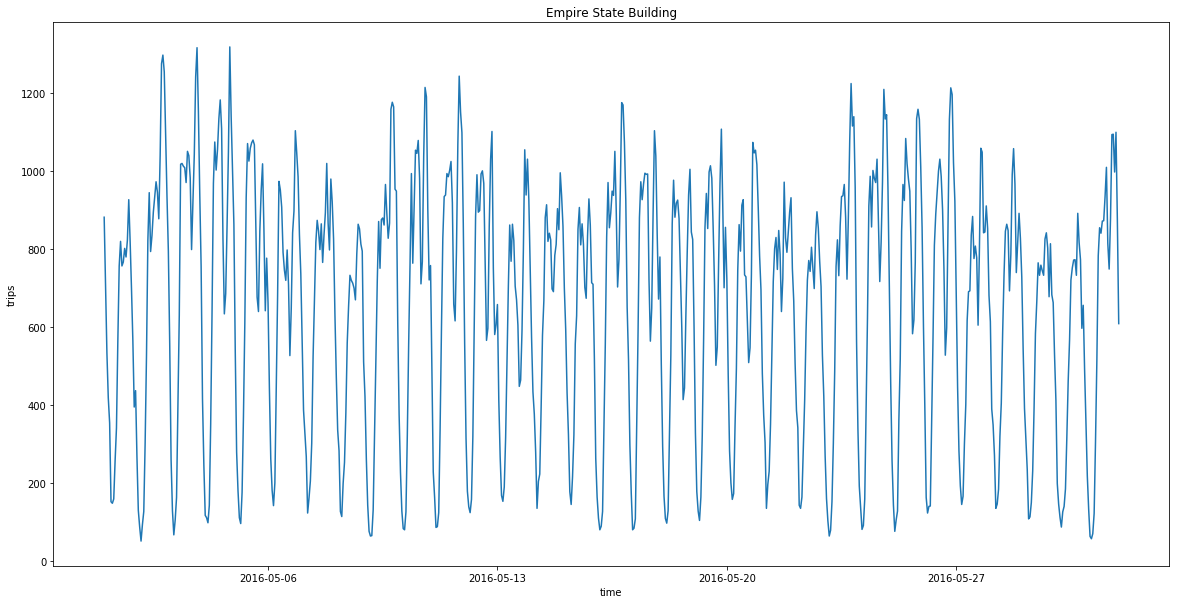

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(regions_df[regions_df.columns[region_esb]].index,regions_df[regions_df.columns[region_esb]].values)
plt.title('Empire State Building')
ax.set_xlabel('time')
ax.set_ylabel('trips')
plt.show()

####6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

In [0]:
hour_arr = np.array(hour_list)
print 'zero value cells: ', len(hour_arr[hour_arr == 0])

zero value cells:  1718238
